In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import datetime
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt


In [2]:
#!pip install tensorflow 

In [3]:
spall = pd.read_csv('../data/sp500_cleaned-final.csv', low_memory=False,parse_dates=['Date'])
sp=spall


cpi = pd.read_csv("../data/cpi_alpha_cleaned-final.csv",parse_dates=['Date'])
inflation = pd.read_csv("../data/inflation_cleaned-final.csv", parse_dates=['Date'])
intRate = pd.read_csv("../data/int_rates_cleaned_final.csv", parse_dates=['Date'])
nfpayroll = pd.read_csv("../data/nfpayroll_cleaned-final.csv", parse_dates=['Date'])
unemployment = pd.read_csv("../data/unemployment-cleaned-final.csv", parse_dates=['Date'])
vix = pd.read_csv("../data/vix_cleaned_final.csv", parse_dates=['Date'])

In [4]:
nfpayroll


,Date,nfpayroll
0,1927-12-30,NaN
1,1928-01-03,NaN
2,1928-01-04,NaN
3,1928-01-05,NaN
4,1928-01-06,NaN
...,...,...
23953,2023-05-12,155420.0
23954,2023-05-15,155420.0
23955,2023-05-16,155420.0
23956,2023-05-17,155420.0


In [5]:
#Global variables
date_Filter = '1990-01-01'

## Data cleanup and tranformation

In [6]:
vix

,Date,Close
0,1927-12-30,NaN
1,1928-01-03,NaN
2,1928-01-04,NaN
3,1928-01-05,NaN
4,1928-01-06,NaN
...,...,...
23953,2023-05-12,17.030001
23954,2023-05-15,17.120001
23955,2023-05-16,17.990000
23956,2023-05-17,16.870001


### Scale all dataframes, dropn columns and dropna

In [7]:
scaler = MinMaxScaler()

# SP500
#Filter the SP data from 01-01-1990
sp = sp[sp['Date'] > date_Filter]
sp = sp.drop(['Open','High','Low'], axis=1).sort_values(by='Date',ascending=True) 
# Scale Close price
sp[['Close']] = scaler.fit_transform(sp[['Close']])
print(sp)




#filter, Scale cpi and dropna
cpi = cpi[cpi['Date'] > date_Filter]
cpi[['CPI']] = scaler.fit_transform(cpi[['CPI']])
cpi = cpi.dropna().reset_index(drop=True)
print(cpi)

#Scale cpi and dropna
inflation = inflation[inflation['Date'] > date_Filter]
inflation[['Value']] = scaler.fit_transform(inflation[['Value']])
inflation = inflation.dropna().reset_index(drop=True)
print(inflation)

#Scale intRate and dropna
intRate = intRate[intRate['Date'] > date_Filter]
intRate[['IntRate']] = scaler.fit_transform(intRate[['IntRate']])
intRate = intRate.dropna().reset_index(drop=True)
print(intRate)

#Scale nfpayroll and dropna
nfpayroll = nfpayroll[nfpayroll['Date'] > date_Filter]
nfpayroll[['nfpayroll']] = scaler.fit_transform(nfpayroll[['nfpayroll']])
nfpayroll = nfpayroll.dropna().reset_index(drop=True)
print(nfpayroll)

#Scale unemployment and dropna
unemployment = unemployment[unemployment['Date'] > date_Filter]
unemployment[['Value']] = scaler.fit_transform(unemployment[['Value']])
unemployment = unemployment.dropna().reset_index(drop=True)
print(unemployment)

#Vix drop unneeded columns
vix = vix[vix['Date'] > date_Filter]
#vix = vix.drop(['Open','High','Low','Adj Close','Volume'], axis=1).sort_values(by='Date',ascending=True) 
#Scale vix and dropna
vix[['Close']] = scaler.fit_transform(vix[['Close']])
vix = vix.dropna().reset_index(drop=True)
print(vix)

            Date     Close
15549 1990-01-02  0.014270
15550 1990-01-03  0.014063
15551 1990-01-04  0.013377
15552 1990-01-05  0.012606
15553 1990-01-08  0.012959
...          ...       ...
23953 2023-05-12  0.850597
23954 2023-05-15  0.853307
23955 2023-05-16  0.847446
23956 2023-05-17  0.858304
23957 2023-05-18  0.867030

[8409 rows x 2 columns]
           Date  CPI
0    1990-01-02  0.0
1    1990-01-03  0.0
2    1990-01-04  0.0
3    1990-01-05  0.0
4    1990-01-08  0.0
...         ...  ...
8404 2023-05-12  1.0
8405 2023-05-15  1.0
8406 2023-05-16  1.0
8407 2023-05-17  1.0
8408 2023-05-18  1.0

[8409 rows x 2 columns]
           Date     Value
0    1990-01-02  0.598214
1    1990-01-03  0.598214
2    1990-01-04  0.598214
3    1990-01-05  0.598214
4    1990-01-08  0.598214
...         ...       ...
8404 2023-05-12  0.633929
8405 2023-05-15  0.633929
8406 2023-05-16  0.633929
8407 2023-05-17  0.633929
8408 2023-05-18  0.633929

[8409 rows x 2 columns]
           Date   IntRate
0    1990-0

C:\Users\kalea\AppData\Local\Temp\ipykernel_29052\4238007453.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfpayroll[['nfpayroll']] = scaler.fit_transform(nfpayroll[['nfpayroll']])
C:\Users\kalea\AppData\Local\Temp\ipykernel_29052\4238007453.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix[['Close']] = scaler.fit_transform(vix[['Close']])


In [8]:
vix

,Date,Close
0,1990-01-02,0.110129
1,1990-01-03,0.123046
2,1990-01-04,0.137050
3,1990-01-05,0.149150
4,1990-01-08,0.151190
...,...,...
8404,2023-05-12,0.107274
8405,2023-05-15,0.108498
8406,2023-05-16,0.120326
8407,2023-05-17,0.105099


AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

### Plot -1  S&P500 CPI and Inflation Rate

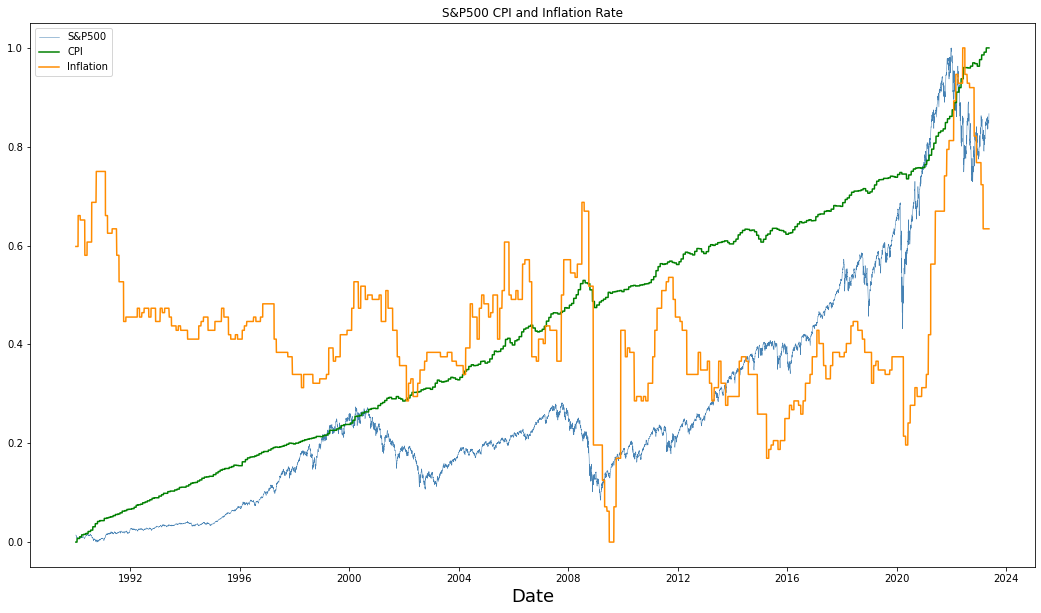

In [13]:
#Plot S&P500, CPI and Inflation Rate

plt.figure(figsize=(18,10))
plt.plot(sp["Date"].to_numpy(), sp["Close"].to_numpy(), label='S&P500', color='steelblue')
plt.plot(cpi["Date"].to_numpy(), cpi["CPI"].to_numpy(), label='CPI', color='green')
plt.plot(inflation["Date"].to_numpy(), inflation["Value"].to_numpy(), label='Inflation', color='darkorange')
plt.xlabel('Date',fontsize=18)
plt.title('S&P500 CPI and Inflation Rate')
plt.legend()
plt.show()


### Plot S&P500, Interest Rates and Nonfarm Payroll

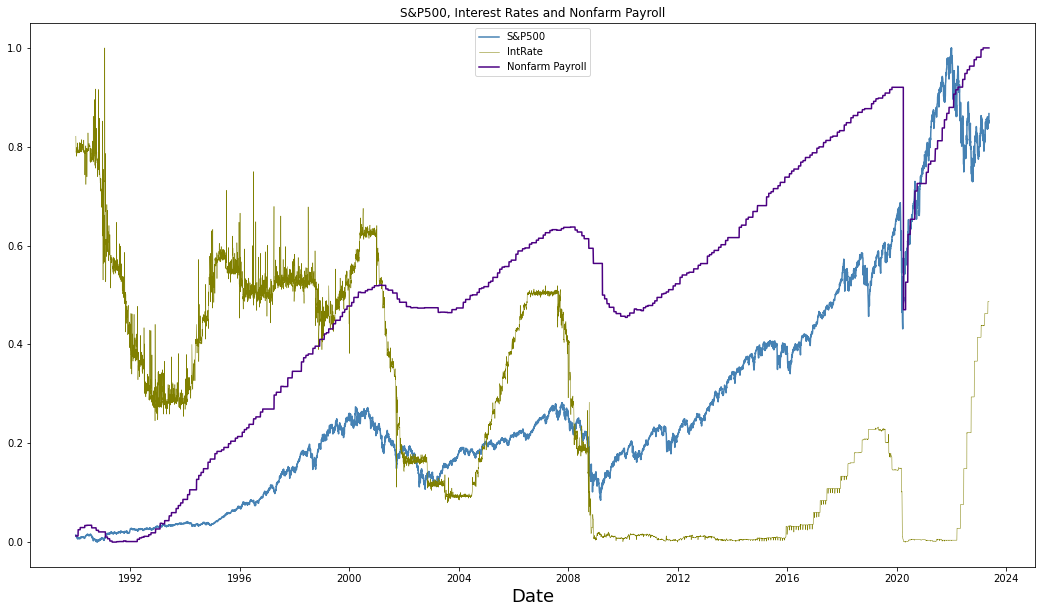

In [16]:
#Plot S&P500, Interest Rates and Nonfarm Payroll

plt.figure(figsize=(18,10))
plt.plot(sp["Date"].to_numpy(), sp["Close"].to_numpy(), label='S&P500', color='steelblue')
plt.plot(intRate["Date"].to_numpy(), intRate["IntRate"].to_numpy(), label='IntRate', color='olive', linewidth=.5)
plt.plot(nfpayroll["Date"].to_numpy(), nfpayroll["nfpayroll"].to_numpy(), label='Nonfarm Payroll', color='indigo')
plt.xlabel('Date',fontsize=18)
plt.title('S&P500, Interest Rates and Nonfarm Payroll')
plt.legend()
plt.show()

### Plot S&P500, Unemployment Rate and VIX

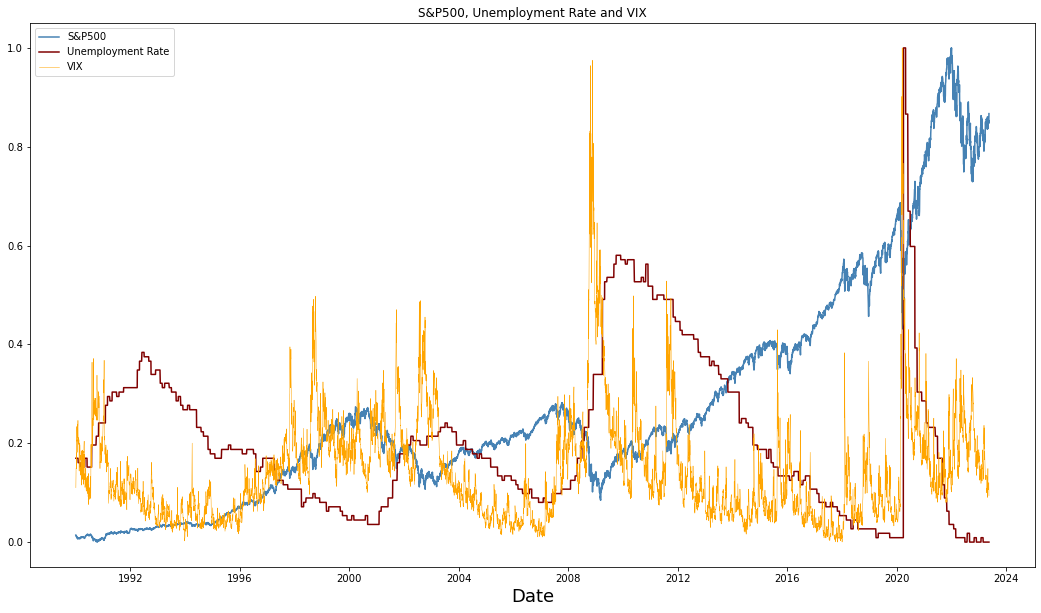

In [18]:
#Plot S&P500, Interest Rates and Nonfarm Payroll

plt.figure(figsize=(18,10))
plt.plot(sp["Date"].to_numpy(), sp["Close"].to_numpy(), label='S&P500', color='steelblue')
plt.plot(unemployment["Date"].to_numpy(), unemployment["Value"].to_numpy(), label='Unemployment Rate', color='maroon')
plt.plot(vix["Date"].to_numpy(), vix["Close"].to_numpy(), label='VIX', color='orange', linewidth=.5)
plt.xlabel('Date',fontsize=18)
plt.title('S&P500, Unemployment Rate and VIX')
plt.legend()
plt.show()

In [19]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 15549 to 23957
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8409 non-null   datetime64[ns]
 1   Close   8409 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.1 KB
